![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm # Vamos usar muito !

# Mínimos quadrados _vs_ Equações Normais

Vimos duas formas de resolver um problema de regressão:
- encontrando a solução de mínimos quadrados para $Xp = b$;
- resolvendo as equações normais $X^\top X p = X^\top b$.

Neste teste, veremos como isto pode gerar diferenças no cálculo de $p$.

# Questão 1: Comparando soluções

Sejam dados uma matriz $A$, $m \times n$, e um vetor $b$.

Escreva uma função que retorna as duas soluções do problema de regressão,
a primeira usando `np.linalg.solve` e a segunda, `np.linalg.lstsq`.

In [2]:
def duas_sols(A,b):
    solve = np.linalg.solve((A.T)@A,(A.T)@b)
    lstsq = np.linalg.lstsq(A,b, rcond=None)[0]
    return solve, lstsq

In [3]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,2,3,4,5,6]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [4]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [0,1,0,1,0,1]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [5]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,1,1,0,0,0]

x1, x2 = duas_sols(A,b)

assert norm(x1-x2) < 1e-14

Ao resolver um problema de regressão, a medida "oficial" é o **erro de regressão**.
Assim, poderia muito bem haver duas soluções $x_1$ e $x_2$, diferentes,
mas tais que $\|Ax_1 - b\|$ e $\|Ax_2 - b\|$ fossem iguais.

Complete a sua função para retornar, também, o erro da regressão, para cada uma das soluções.
Retorne duas tuplas, uma com as 2 soluções, a segunda com os 2 erros.

In [6]:
def duas_sols_erros(A,b):
    solve = np.linalg.solve((A.T)@A,(A.T)@b)
    erro_solve = norm(A@solve - b)
    lstsq = np.linalg.lstsq(A,b, rcond=None)[0]
    erro_lstsq = norm(A@lstsq - b)
    
    return((solve,lstsq),(erro_solve,erro_lstsq))

In [7]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [6,5,4,3,2,1]

(x1, x2), (e1, e2) = duas_sols_erros(A,b)
assert np.allclose(x1,x2)
assert 7 < e1 < 8
assert 7 < e2 < 8

Calcule os erros de regressão para cada um dos casos anteriores,
e também a diferença entre eles.

In [8]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,2,3,4,5,6]

erros1 = duas_sols_erros(A,b)[1]
diferenca1 = erros1[0] - erros1[1]
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [0,1,0,1,0,1]

erros2 = duas_sols_erros(A,b)[1]
diferenca2 = erros2[0] - erros2[1]

A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,1,1,0,0,0]

erros3 = duas_sols_erros(A,b)[1]
diferenca3 = erros3[0] - erros3[1]

A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [6,5,4,3,2,1]

erros4 = duas_sols_erros(A,b)[1]
diferenca4 = erros4[0] - erros4[1]

print(erros1,diferenca1)
print(erros2,diferenca2)
print(erros3,diferenca3)
print(erros4,diferenca4)

(1.2273929715024061, 1.2273929715024061) 0.0
(1.044465935734187, 1.044465935734187) 0.0
(1.627682600923979, 1.6276826009239789) 2.220446049250313e-16
(7.631105177742358, 7.631105177742358) 0.0


O que você observa?

Os erros são basicamente iguais, sendo diferente apenas o caso 3, onde eles não são iguais para o computador, mas podemos considerar eles iguais visto que a diferença está na casa do -16.

# Questão 2: Analisando muitos casos

Para entender o comportamento médio, vamos gerar vetores $b$ aleatórios.

Compare, com um histograma, os erros de regressão, para 1000 vetores $b$ aleatórios, e a matriz $A$ acima.

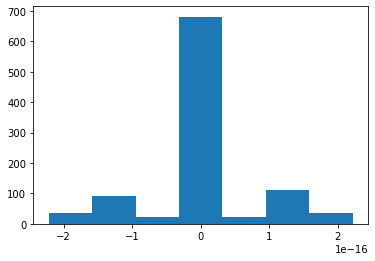

In [9]:
np.random.seed(1)
erros = []
for _ in range(1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(6))
    erros.append(e2 - e1)
plt.hist(erros,7)

ax = plt.gca()

In [10]:
minx, maxx = ax.get_xlim()

assert -2e-15 < minx < maxx < 2e-15

Algum dos métodos dá consistentemente o menor erro?

Em grande parte dos valores, a diferença entre eles é igual a 0, como visto no histograma. Se um dos métodos desse o erro consistentemente menor, um dos lados do histograma estariacom mais dados que o outro.

Agora, vamos usar matrizes (bem) maiores.

Escolha uma matriz $A$, $30 \times 4$ com entradas uniformemente escolhidas em $[0,1]$,
e repita o que fizemos acima para 1000 valores aleatórios de $b$.

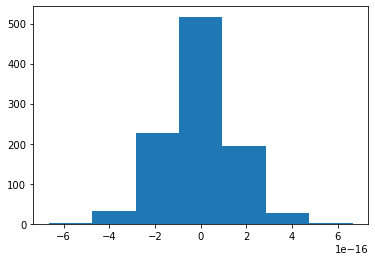

In [11]:
np.random.seed(2)
A = np.random.rand(30,4)
erros = []
for _ in range(1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(30))
    erros.append(e2 - e1)
plt.hist(erros,7)

ax = plt.gca()

In [12]:
minx, maxx = ax.get_xlim()

assert -4e-15 < minx < maxx < 4e-15

O comportamento dos erros mudou?

É possivel perceber que agora os erros começaram a "pesar" mais pros lados, tendo menos valores com diferença = 0, e mais valores com um dos erros menor que o outro.

E agora, faça para matrizes $300 \times 10$.

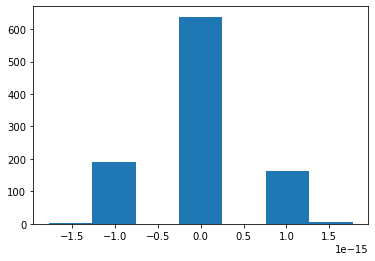

In [13]:
np.random.seed(1)
A = np.random.rand(300,10)
erros = []
for _ in range(1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(300))
    erros.append(e2 - e1)
plt.hist(erros,7)

ax = plt.gca()

In [14]:
minx, maxx = ax.get_xlim()

assert -10e-15 < minx < maxx < 10e-15

Esse gráfico confirma a tendência quando a matriz fica maior?

Na verdade, aumentamos a matriz mas a ideia original permaneceu, o número de 0 permaneceu o maior, simbolizando que em sua maioria não existe um erro menor que outro. Apesar disso é possível perceber que o valor do erro aumenta no último caso, onde a escala do histograma é alterada.


# Questão 3: Matrizes de Hilbert

A matriz de Hilbert é uma matriz famosa, cujas entradas $H_{i,j}$ são $\frac{1}{i+j-1}$.

Por exemplo, a matriz $3\times 2$ é
$$\begin{bmatrix}
  1 & 1/2 \\
1/2 & 1/3 \\
1/3 & 1/4
\end{bmatrix}$$

Escreva a função `hilb(n,m)` que retorna a matriz de Hilbert $n \times m$:

In [15]:
def hilb(n,m):
    
    
    if m < 1 or n < 0:
        raise ValueError("Matrix size must be one or greater")
    elif m == 1 and (n == 0 or n == 1):
        return np.array([[1]])
    elif n == 0:
        n = m

    v = np.arange(1, m + 1) + np.arange(0, n)[:, np.newaxis]
    return 1. / v

In [16]:
assert np.all(hilb(3,2) == [[1, 1/2], [1/2, 1/3], [1/3, 1/4]])

In [17]:
H = hilb(40,20)
assert H.shape == (40,20)

In [18]:
H = hilb(30,4)
assert H[10,3] == 1/(10+3+1)

Explique porque o teste acima é feito com $\frac{1}{10+3+1}$ em vez de $\frac{1}{10+3-1}$.

Pois precisamos fazer uma tradução entre a matriz de Hilbert e a matriz do numpy. A matriz de Hilbert começa com indice 1, já a numpy com indice 0. Então quando dizemos que queremos o elemento do indice [10,3] no numpy, estamos nos referindo ao elemento de indice (11,4) na matriz de hilbert, e para calcular isso fazemos, 1/(11 + 4 - 1) , que pode ser simplificado como:
- 1/(11 + 4 - 1)
- 1/(10 + 1 + 3 + 1 - 1)
- 1/(10 + 3 + 1)

# Questão 4: Regressão com a matriz de Hilbert

Considere a matriz de Hilbert $30 \times 4$, e calcule a regressão para um vetor $b$ aleatório.
Calcule
- a diferença entre as soluções; e
- a diferença entre os erros de regressão.

In [19]:
H = hilb(30,4)

(x1, x2), (e1, e2) = duas_sols_erros(H,np.random.rand(30))

dif_solucoes = x1 - x2
dif_erros = e1 - e2

print("Diferença entre soluções:")
print(dif_solucoes)
print("")
print("Diferença entre os erros de regressão:")
print(dif_erros)

Diferença entre soluções:
[ 1.92753546e-09 -1.67587757e-08  3.40025963e-08 -1.95072971e-08]

Diferença entre os erros de regressão:
2.886579864025407e-15


Calcule, também, o erro relativo entre as soluções, de duas formas:
- coordenada a coordenada, $\frac{|x1_i - x2_i|}{|x1_i| + |x2_i|}$,
- global, $\frac{||x1 - x2||}{||x1|| + ||x2||}$.

(Obs: como não há um método que seja "a priori" mais exato do que o outro, normalizamos pela soma dos valores absolutos)

In [20]:
coor_a_coord = (abs(x1-x2))/(abs(x1) + abs(x2))
print("Erro relativo de coordenada a coordenada:")
print(coor_a_coord)

print(" ")

glob = (norm(x1-x2))/(norm(x1) + norm(x2))
print("Erro relativo global:")
print(glob)

Erro relativo de coordenada a coordenada:
[4.23280403e-11 3.65544065e-11 3.22274954e-11 2.89982593e-11]
 
Erro relativo global:
3.2005478963643857e-11


Agora, aumente para $300 \times 10$, e calcule
- a diferença entre as soluções,
- os erros relativos entre as soluções,
- a diferença entre os erros de regressão.

In [21]:
np.random.seed(1)

H = hilb(300,10)

(x1, x2), (e1, e2) = duas_sols_erros(H,np.random.rand(300))

dif_solucoes = x1 - x2
dif_erros = e1 - e2

print("Diferença entre soluções:")
print(dif_solucoes)
print("")
coor_a_coord = (abs(x1-x2))/(abs(x1) + abs(x2))
print("Erro relativo de coordenada a coordenada:")
print(coor_a_coord)


print(" ")

glob = (norm(x1-x2))/(norm(x1) + norm(x2))
print("Erro relativo global:")
print(glob)
print(" ")
print("Diferença entre os erros de regressão:")
print(dif_erros)

Diferença entre soluções:
[ 2.99960896e+04 -2.08789881e+06  3.60583547e+07 -2.69785739e+08
  1.07602687e+09 -2.51051911e+09  3.54302152e+09 -2.98036996e+09
  1.37638268e+09 -2.68756809e+08]

Erro relativo de coordenada a coordenada:
[0.48510655 0.61740745 0.72714663 0.81850003 0.8943758  0.95706499
 1.         1.         1.         1.        ]
 
Erro relativo global:
0.9810478112240045
 
Diferença entre os erros de regressão:
0.3690314886726336


O que aconteceu?

Podemos perceber que o erro relativo e os erros de regressão aumentaram bastante, e conforme pegamos um i e j maior para o valor Aij da matriz, maior o erro se apresenta. 

Sendo que o erro relativo se mostra no final com uma magnitude igual a soma das soluções, por isso o resultado 1.

E o erro relativo global, e os erros de regressão, também demonstram a mesma caracterísica trazendo um erro maior em comparação à matriz de Hilbert com menos linhas. 

Podemos concluir então que o erro tende a aumentar, conforme comparamos soluções menores.

# Questão 5: Outro sistema

Agora, considere a matriz com entradas inteiras em sequência:
$$ A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \\
13 & 14 & 15 \\
16 & 17 & 18
\end{bmatrix} $$

Resolva o problema de regressão para o vetor $b = (1,1,1,1,1,1)$, pelos dois métodos, e calcule os erros.

In [22]:
A = np.arange(1,19).reshape(6,3)

(x1, x2), (e1, e2) = duas_sols_erros(A,np.ones(6))

LinAlgError: Singular matrix

O que aconteceu?

Tivemos um erro de "Singular Matrix" pois quando passamos para solve a matriz A, a função tenta resolver o problema Ax = b, com nosso A sendo (A.T)@A , e (A.T)@A é uma matriz com determinante = 0, logo ela terá infintas ou nenhuma solução. Impossibilitando a resolução do problema.